In [1]:
library(ggplot2)
library(dplyr)
report_theme <- theme(
  panel.background = element_rect(fill = "white"),
  axis.text.x = element_text(size = 14, color = "#143264", angle = -30, vjust = 0.6),
  axis.text.y = element_text(size = 14, color = "#143264"),
  axis.title = element_text(size = 20, color = "#143264"),
  title = element_text(color = "#143264", size = 20),
  legend.title = element_text(color = "#143264", size = 14),
  legend.text = element_text(color = "#143264", size = 14),
  strip.text.x = element_text(size = 14)
)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
US = read.csv('../../prngs-and-permutations/Code/samplingComparison/results/uniqueSampleSummary.csv', header = TRUE)
US$Algorithm <- factor(US$Algorithm, levels = c("PIKK", "FYKD", "sample_by_index", "Random_Sample", "Algorithm_R"))

In [5]:
barplot <- US %>% 
    filter(Pop.size == 13, Sample.size == 4, seed == 233424280) %>% 
    mutate(color = ifelse(Algorithm %in% c("FYKD", "PIKK"), "Shuffle", "Smart Sampling")) %>%
    filter(reps %in% c(1e5, 1e6, 1e7)) %>%
    mutate(reps_clean = paste0(reps, " samples")) %>%
ggplot(aes(x = factor(Algorithm), y = Range.P.value, fill = color)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    facet_grid(reps_clean~.)  + 
    scale_fill_brewer(palette = "Set1") + 
    labs(y = "P-value", x = "", title = "Range test p-values for n=13, k=4") +
    theme_bw() + 
    report_theme + 
    theme(legend.position = "none")


pdf("../fig/sa-comparison.pdf", width = 12)
barplot
dev.off()

pdf 
  2

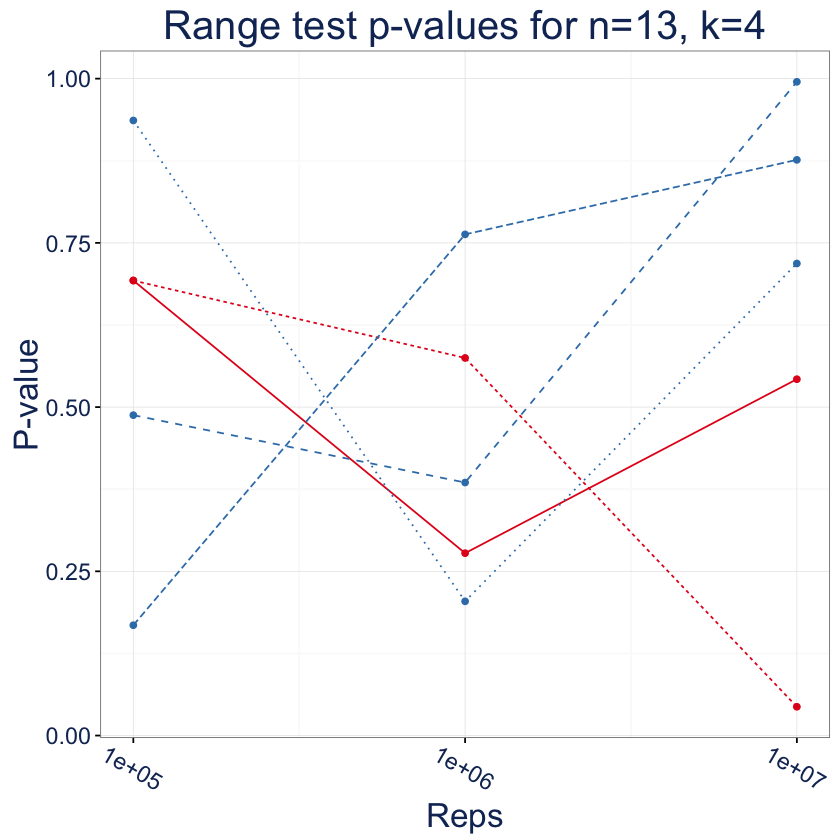

In [9]:
lineplot <- US %>% 
    filter(Pop.size == 13, Sample.size == 4, seed == 233424280) %>% 
    mutate(color = ifelse(Algorithm %in% c("FYKD", "PIKK"), "Shuffle", "Smart Sampling")) %>%
    filter(reps %in% c(1e5, 1e6, 1e7)) %>%
    mutate(reps_clean = paste0(reps, " samples")) %>%
ggplot(aes(x = reps, y = Range.P.value, color = color, linetype = Algorithm)) + 
    geom_point() + geom_line() +
    scale_color_brewer(palette = "Set1") + 
    labs(y = "P-value", x = "Reps", title = "Range test p-values for n=13, k=4") +
    theme_bw() + 
    scale_x_log10() +
    report_theme + 
    theme(legend.position = "none")

lineplot
#pdf("../fig/sa-comparison.pdf", width = 12)
#barplot
#dev.off()